In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import datetime as dt
import pandas_datareader as pdr


from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM 

In [3]:
key = '8aa0c212b63229da7d43e968852867579f8eac7a'

In [4]:
df = pdr.get_data_tiingo('AAPL', api_key = key)
df.to_csv('AAPL.csv')

<ipython-input-4-8d007c02bd27>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key = key)


In [5]:
from pandas.io.parsers.readers import read_csv
data = read_csv('AAPL.csv')

In [6]:
company = 'AAPL'

In [2]:
# load data
company = 'ADANIENT.NS'

start = dt.datetime(2013,1,1)
end = dt.datetime.now()

data = yf.download(company, start, end)
data.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-28,1868.050049,1944.000000,1857.150024,1924.949951,1924.949951,6159130
2023-05-02,1935.000000,1966.000000,1908.000000,1919.849976,1919.849976,3813963
2023-05-03,1919.000000,1940.000000,1785.349976,1839.000000,1839.000000,5849432
2023-05-04,1839.050049,1935.000000,1839.050049,1911.250000,1911.250000,4842127
2023-05-05,1954.800049,1955.000000,1903.150024,1920.300049,1920.300049,6137744
2023-05-08,1920.300049,1926.900024,1876.000000,1887.500000,1887.500000,2835197
2023-05-09,1900.000000,1930.000000,1889.099976,1896.099976,1896.099976,2700563
2023-05-10,1899.000000,1914.900024,1883.949951,1892.150024,1892.150024,1970906
2023-05-11,1925.000000,2013.750000,1910.000000,1984.650024,1984.650024,8835941


In [3]:
data['Close']

Date
2013-01-01      42.288589
2013-01-02      43.737038
2013-01-03      43.024307
2013-01-04      42.411209
2013-01-07      42.825050
                 ...     
2023-05-08    1887.500000
2023-05-09    1896.099976
2023-05-10    1892.150024
2023-05-11    1984.650024
2023-05-12    1964.699951
Name: Close, Length: 2556, dtype: float64

In [4]:
#Prepare data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 365

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [5]:
#Build model

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #predict the next closing price

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25,batch_size=32)

Epoch 1/25
69/69 [==============================] - 12s 32ms/step - loss: 0.0076
Epoch 2/25
69/69 [==============================] - 2s 29ms/step - loss: 0.0020
Epoch 3/25
69/69 [==============================] - 2s 31ms/step - loss: 0.0023
Epoch 4/25
69/69 [==============================] - 2s 35ms/step - loss: 0.0017
Epoch 5/25
69/69 [==============================] - 2s 35ms/step - loss: 0.0013
Epoch 6/25
69/69 [==============================] - 2s 35ms/step - loss: 0.0013
Epoch 7/25
69/69 [==============================] - 2s 29ms/step - loss: 0.0012
Epoch 8/25
69/69 [==============================] - 2s 29ms/step - loss: 0.0015
Epoch 9/25
69/69 [==============================] - 3s 37ms/step - loss: 0.0015
Epoch 10/25
69/69 [==============================] - 2s 29ms/step - loss: 0.0011
Epoch 11/25
69/69 [==============================] - 2s 29ms/step - loss: 0.0011
Epoch 12/25
69/69 [==============================] - 2s 29ms/step - loss: 0.0011
Epoch 13/25
69/69 [=================

In [6]:
'''Test the accuracy on existing data'''

test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = yf.download(company, test_start, test_end)
actual_price = data['Close'].values

# total_dataset = pd.concat((data['Close'],test_data['Close']), axis=0)

# model_inputs = total_dataset[len(total_dataset)-len(test_data)- prediction_days:].values
model_inputs = test_data['Close'].values.reshape(-1,1)
# model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

[*********************100%***********************]  1 of 1 completed


In [7]:
len(model_inputs)

835

15/15 [==============================] - 1s 23ms/step


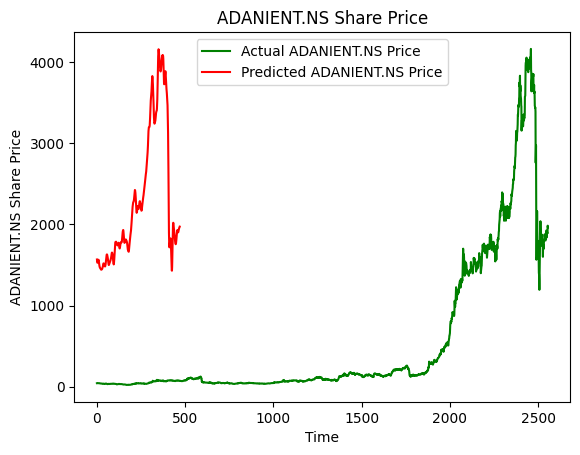

In [8]:
# Make the Prediction on Test Data

x_test = []

for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1,1))

#Plot the Test Predictions
plt.plot(actual_price,color='green',label=f'Actual {company} Price')
plt.plot(predicted_prices,color='red',label=f'Predicted {company} Price')
plt.title(f'{company} Share Price')
plt.xlabel(f'Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

In [9]:
# Predict Next Days
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction.reshape(-1,1)).reshape(prediction.shape)
print(f"Prediction: {prediction}")

1/1 [==============================] - 1s 881ms/step
Prediction: [[1984.5543]]


In [11]:
x_input = model_inputs.reshape(1,-1)
x_input.shape

(1, 835)

In [12]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [14]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=835
i=0

while(i<30):

    if(len(temp_input)>835):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print (yhat[0])
        temp_input. extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.47387344]
836
1 day input [0.04603403 0.04533438 0.04322335 0.04430902 0.04369381 0.045262
 0.04552739 0.04661306 0.046794   0.04733684 0.04815712 0.0501837
 0.04973737 0.04918247 0.04958055 0.05047322 0.0505094  0.05070241
 0.05054559 0.05112462 0.05093161 0.05043702 0.04837425 0.04947198
 0.05207759 0.05213791 0.05286169 0.05406799 0.054261   0.05532254
 0.05574474 0.05687866 0.05599807 0.05526222 0.05635996 0.05748181
 0.05473145 0.05453844 0.05365785 0.05157095 0.04783142 0.04781936
 0.04954436 0.04842251 0.04857932 0.0468905  0.04325954 0.04230656
 0.03420023 0.03096735 0.02757764 0.027264   0.02649197 0.02617833
 0.02830142 0.02424826 0.02652816 0.02699862 0.02891664 0.0259612
 0.02613008 0.0282773  0.0273967  0.02621453 0.02840999 0.02839793
 0.02944741 0.03030388 0.03012294 0.02965248 0.02979723 0.03047276
 0.02787922 0.0282773  0.02897695 0.02756558 0.02755352 0.02868744
 0.02873569 0.02919408 0.02681768 0.02709512 0.02722782 0.02762589
 0.02816873 0.02886838 0.02883219 0.0

In [15]:
day_new =np.arange(1,835)
day_pred =np.arange(835,865)

In [21]:
df3=scaled_data.tolist()
df3.extend(lst_output)

In [22]:
df1 = scaled_data

In [23]:
df1.shape

(2556, 1)

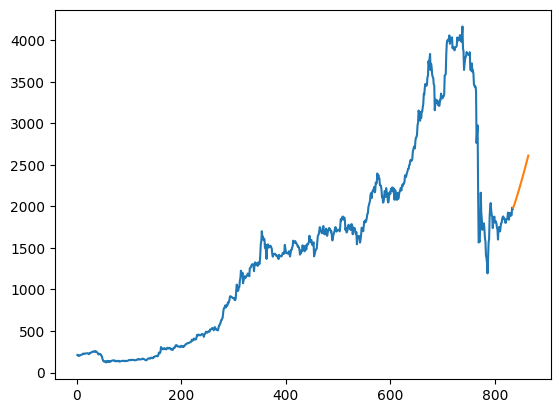

In [29]:
plt.plot(day_new, scaler. inverse_transform(df1[1722:]))
plt.plot(day_pred, scaler. inverse_transform(lst_output))